## Setup

In [1]:
import seaborn as sns
import pylab as plot
import matplotlib.pyplot as plt
import numpy as np

# Set plotting
sns.set_style("ticks")
sns.set_palette(sns.color_palette("hls", 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'legend.fontsize': 15}
plot.rcParams.update(params)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)

In [2]:
def read_key_from_log(path, key, i_key, agent=None, i_agent=None):
    with open(path) as f:
        content = f.read().splitlines()

    data = []
    for line in content:
        target_data = None
        if key in line:
            if i_agent is not None:
                words = line.split()
                if int(words[i_agent]) == agent:
                    target_data = line.split()[i_key]
            else:
                target_data = line.split()[i_key]
                
        if target_data is not None:
            if target_data[0] == "[":
                target_data = target_data[1:]
            if target_data[0] == "(":
                target_data = target_data[1:]                
            if target_data[0] == ",":
                target_data = target_data[1:]
            if target_data[-1] == ",":
                target_data = target_data[0:-1]
            if target_data[-1] == ")":
                target_data = target_data[0:-1]
                
            data.append(float(target_data))

    assert len(data) > 0

    return data

## Result Visualization

In [3]:
path = \
    "/home/dongki/tmp/log_hml/" + \
    "task::velocity_learning_rates::0.01-0.01-0.005_max_iterations::2-2-10000_batch::20-20-2_args.n_contexts::2-2_is_hierarchical::False_prefix::"
vel_cavia = np.array(read_key_from_log(path, key="after", i_key=-4))
print("vel_cavia shape:", vel_cavia.shape)

vel_cavia shape: (1051,)


In [4]:
path = \
    "/home/dongki/tmp/log_hml/" + \
    "task::acceleration_learning_rates::0.01-0.01-0.005_max_iterations::2-2-10000_batch::20-20-2_args.n_contexts::2-2_is_hierarchical::False_prefix::"
acc_cavia = np.array(read_key_from_log(path, key="after", i_key=-4))
print("acc_cavia shape:", acc_cavia.shape)

acc_cavia shape: (1047,)


In [5]:
path = \
    "/home/dongki/tmp/log_hml/" + \
    "task::mixture_learning_rates::0.01-0.01-0.005_max_iterations::2-2-10000_batch::20-20-2_args.n_contexts::2-2_is_hierarchical::False_prefix::"
mixture_cavia = np.array(read_key_from_log(path, key="after", i_key=-4))
mixture_cavia_vel = mixture_cavia[0::2]
mixture_cavia_acc = mixture_cavia[1::2]
mixture_cavia = (mixture_cavia_vel + mixture_cavia_acc) / 2.
print("mixture_cavia shape:", mixture_cavia.shape)

mixture_cavia shape: (339,)


In [6]:
path = \
    "/home/dongki/tmp/log_hml/" + \
    "task::mixture_learning_rates::0.01-0.01-0.005_max_iterations::2-2-10000_batch::20-20-2_args.n_contexts::2-2_is_hierarchical::True_prefix::"
mixture_ours = np.array(read_key_from_log(path, key="after", i_key=-4))
mixture_ours_vel = mixture_ours[0::2]
mixture_ours_acc = mixture_ours[1::2]
mixture_ours = (mixture_ours_vel + mixture_ours_acc) / 2.
print("mixture_ours shape:", mixture_ours.shape)

mixture_ours shape: (69,)


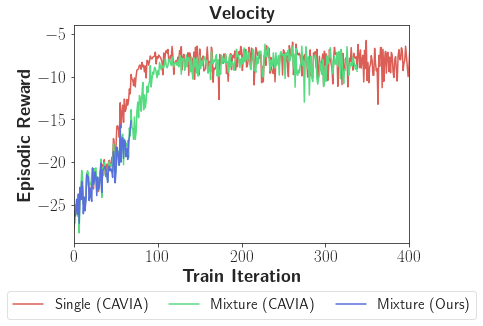

In [7]:
fig, ax = plt.subplots()
sns.set_style("ticks")

datas = [vel_cavia, mixture_cavia_vel, mixture_ours_vel]
legends = ["Single (CAVIA)", "Mixture (CAVIA)", "Mixture (Ours)"]
colors = [
    sns.color_palette("hls", 8)[0], 
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6]]
    
for data, legend, color in zip(datas, legends, colors):
    ax.plot(np.arange(data.shape[0]), data, '-', label=legend, color=color)      
         
plt.xlim([0, 400])
plt.xlabel(r'\textbf{Train Iteration}', size=18)
plt.ylabel(r'\textbf{Episodic Reward}', size=18)
plt.title(r'\textbf{Velocity}', size=18)
legend = plt.legend(
    frameon=True,
    framealpha=0.6,
    bbox_to_anchor=(-0.2, -0.35, 1.4, .202), 
    loc=3,
    ncol=3, 
    mode="expand", 
    borderaxespad=0.)

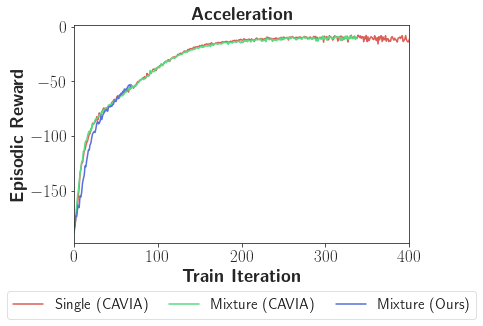

In [8]:
fig, ax = plt.subplots()
sns.set_style("ticks")

datas = [acc_cavia, mixture_cavia_acc, mixture_ours_acc]
legends = ["Single (CAVIA)", "Mixture (CAVIA)", "Mixture (Ours)"]
colors = [
    sns.color_palette("hls", 8)[0], 
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6]]
    
for data, legend, color in zip(datas, legends, colors):
    ax.plot(np.arange(data.shape[0]), data, '-', label=legend, color=color)      
         
plt.xlim([0, 400])
plt.xlabel(r'\textbf{Train Iteration}', size=18)
plt.ylabel(r'\textbf{Episodic Reward}', size=18)
plt.title(r'\textbf{Acceleration}', size=18)
legend = plt.legend(
    frameon=True,
    framealpha=0.6,
    bbox_to_anchor=(-0.2, -0.35, 1.4, .202), 
    loc=3,
    ncol=3, 
    mode="expand", 
    borderaxespad=0.)

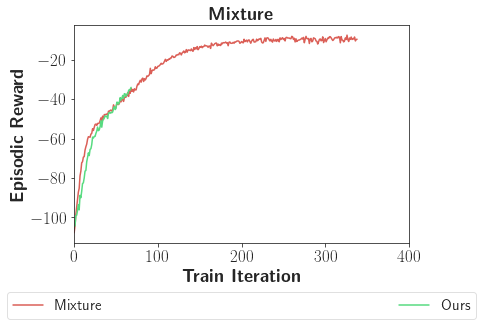

In [9]:
fig, ax = plt.subplots()
sns.set_style("ticks")

datas = [mixture_cavia, mixture_ours]
legends = ["Mixture", "Ours"]
colors = [
    sns.color_palette("hls", 8)[0], 
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6]]
    
for data, legend, color in zip(datas, legends, colors):
    ax.plot(np.arange(data.shape[0]), data, '-', label=legend, color=color)      
         
plt.xlim([0, 400])
plt.xlabel(r'\textbf{Train Iteration}', size=18)
plt.ylabel(r'\textbf{Episodic Reward}', size=18)
plt.title(r'\textbf{Mixture}', size=18)
legend = plt.legend(
    frameon=True,
    framealpha=0.6,
    bbox_to_anchor=(-0.2, -0.35, 1.4, .202), 
    loc=3,
    ncol=3, 
    mode="expand", 
    borderaxespad=0.)

## Trajectory Visualization

In [10]:
path = "/home/dongki/tmp/log_hml/tb_task::velocity_learning_rates::0.01-0.01-0.005_max_iterations::2-2-10000_batch::20-20-2_args.n_contexts::2-2_is_hierarchical::False_prefix::"
path = path + "/obs_i_meta_task::0_iter::365.npy"
vel_cavia_traj = np.load(path)
print(vel_cavia_traj)
print("vel_cavia shape:", vel_cavia_traj.shape)

[[ 0.   0. ]
 [ 0.  -0.1]
 [ 0.   0. ]
 [ 0.  -0.1]
 [ 0.  -0.2]
 [ 0.  -0.2]
 [ 0.  -0.2]
 [ 0.  -0.2]
 [-0.1 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [ 0.  -0.1]
 [ 0.  -0.2]
 [ 0.  -0.1]
 [ 0.  -0.1]
 [-0.1 -0.1]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [ 0.  -0.2]
 [ 0.  -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.2]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.2]
 [-0.1 -0.3]
 [-0.1 -0.3]
 [ 0.  -0.3]]
vel_cavia shape: (50, 2)


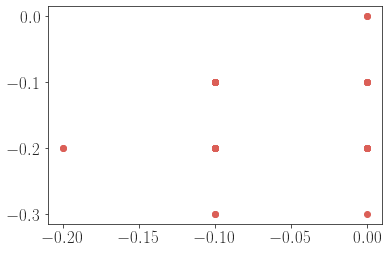

In [11]:
plt.scatter(vel_cavia_traj[:, 0], vel_cavia_traj[:, 1])
plt.show()